# 1. Import and Install Dependencies

## 1.1 Install Dependencies

In [3]:
!pip install tensorflow==2.8.0 
!pip install tensorflow-gpu==2.8.0
!pip install tensorflow-io==0.24.0
!pip install matplotlib


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 1.2 Load Dependencies

In [4]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio
import time
import librosa
import numpy as np

# 2. Build Data Loading Function

## 2.1 Define Paths to Files

In [5]:
BLUES_FILE = os.path.join('data', 'genres_original', 'blues', 'blues.00000.wav')
CLASSICAL_FILE = os.path.join('data', 'genres_original', 'classical', 'classical.00000.wav')
COUNTRY_FILE = os.path.join('data', 'genres_original', 'country', 'country.00000.wav')
DISCO_FILE = os.path.join('data', 'genres_original', 'disco', 'disco.00000.wav')
HIPHOP_FILE = os.path.join('data', 'genres_original', 'hiphop', 'hiphop.00000.wav')
JAZZ_FILE = os.path.join('data', 'genres_original', 'jazz', 'jazz.00000.wav')
METAL_FILE = os.path.join('data', 'genres_original', 'metal', 'metal.00000.wav')
POP_FILE = os.path.join('data', 'genres_original', 'pop', 'pop.00000.wav')
REGGAE_FILE = os.path.join('data', 'genres_original', 'reggae', 'reggae.00000.wav')
ROCK_FILE = os.path.join('data', 'genres_original', 'rock', 'rock.00000.wav')

## 2.2 Build Dataloading Function

In [6]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

## 2.3 Plot Wave

In [7]:
# BLUES_WAVE = load_wav_16k_mono(BLUES_FILE)
CLASSICAL_WAVE = load_wav_16k_mono(CLASSICAL_FILE)
# COUNTRY_WAVE = load_wav_16k_mono(COUNTRY_FILE)
# DISCO_WAVE = load_wav_16k_mono(DISCO_FILE)
HIPHOP_WAVE = load_wav_16k_mono(HIPHOP_FILE)
JAZZ_WAVE = load_wav_16k_mono(JAZZ_FILE)
# METAL_WAVE = load_wav_16k_mono(METAL_FILE)
POP_WAVE = load_wav_16k_mono(POP_FILE)
# REGGAE_WAVE = load_wav_16k_mono(REGGAE_FILE)
ROCK_WAVE = load_wav_16k_mono(ROCK_FILE)

In [8]:
file_contents = tf.io.read_file(BLUES_FILE)
wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
wav

<tf.Tensor: shape=(661794, 1), dtype=float32, numpy=
array([[ 0.00732422],
       [ 0.01660156],
       [ 0.00762939],
       ...,
       [-0.05560303],
       [-0.06106567],
       [-0.06417847]], dtype=float32)>

In [9]:
sample_rate

<tf.Tensor: shape=(), dtype=int32, numpy=22050>

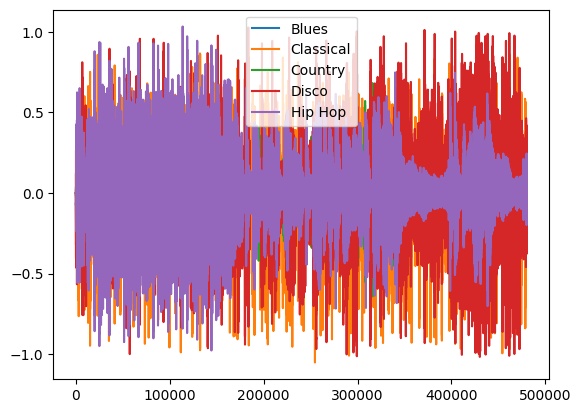

In [10]:
# plt.plot(BLUES_WAVE)
plt.plot(CLASSICAL_WAVE)
# plt.plot(COUNTRY_WAVE)
# plt.plot(DISCO_WAVE)
plt.plot(HIPHOP_WAVE)
plt.plot(JAZZ_WAVE)
# plt.plot(METAL_WAVE)
plt.plot(POP_WAVE)
# plt.plot(REGGAE_WAVE)
plt.plot(ROCK_WAVE)
plt.legend(['Blues', 'Classical', 'Country', 'Disco', 'Hip Hop', 'Jazz', 'Metal', 'Pop', 'Reggae', 'Rock'])
plt.show()

# 3. Create Tensorflow Dataset

## 3.1 Define Paths to Positive and Negative Data

In [11]:
# POS = os.path.join('data', 'Parsed_Capuchinbird_Clips')
# NEG = os.path.join('data', 'Parsed_Not_Capuchinbird_Clips')
# BLUES = os.path.join('data', 'genres_original', 'blues')
CLASSICAL = os.path.join('data', 'genres_original', 'classical')
# COUNTRY = os.path.join('data', 'genres_original', 'country')
# DISCO = os.path.join('data', 'genres_original', 'disco')
HIPHOP = os.path.join('data', 'genres_original', 'hiphop')
JAZZ = os.path.join('data', 'genres_original', 'jazz')
# METAL = os.path.join('data', 'genres_original', 'metal')
POP = os.path.join('data', 'genres_original', 'pop')
# REGGAE = os.path.join('data', 'genres_original', 'reggae')
ROCK = os.path.join('data', 'genres_original', 'rock')

## 3.2 Create Tensorflow Datasets

In [12]:
# pos = tf.data.Dataset.list_files(POS+'\*.wav')
# neg = tf.data.Dataset.list_files(NEG+'\*.wav')
# blues = tf.data.Dataset.list_files(BLUES+'\*.wav')
classical = tf.data.Dataset.list_files(CLASSICAL+'\*.wav')
# country = tf.data.Dataset.list_files(COUNTRY+'\*.wav')
# disco = tf.data.Dataset.list_files(DISCO+'\*.wav')
hiphop = tf.data.Dataset.list_files(HIPHOP+'\*.wav')
jazz = tf.data.Dataset.list_files(JAZZ+'\*.wav')
# metal = tf.data.Dataset.list_files(METAL+'\*.wav')
pop = tf.data.Dataset.list_files(POP+'\*.wav')
# reggae = tf.data.Dataset.list_files(REGGAE+'\*.wav')
rock = tf.data.Dataset.list_files(ROCK+'\*.wav')

## 3.3 Add labels and Combine Positive and Negative Samples

In [13]:
# positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
# negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
# data = positives.concatenate(negatives)

# genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
genres = ['classical', 'hiphop', 'jazz', 'pop', 'rock']

# Create a dictionary to map genre names to integer labels
genre_to_label = {genre: i for i, genre in enumerate(genres)}

# Create datasets for each genre using one-hot encoding for the labels
# blues_data = blues.map(lambda x: (x, tf.one_hot(genre_to_label['blues'], len(genres))))
classical_data = classical.map(lambda x: (x, tf.one_hot(genre_to_label['classical'], len(genres))))
# country_data = country.map(lambda x: (x, tf.one_hot(genre_to_label['country'], len(genres))))
# disco_data = disco.map(lambda x: (x, tf.one_hot(genre_to_label['disco'], len(genres))))
hiphop_data = hiphop.map(lambda x: (x, tf.one_hot(genre_to_label['hiphop'], len(genres))))
jazz_data = jazz.map(lambda x: (x, tf.one_hot(genre_to_label['jazz'], len(genres))))
# metal_data = metal.map(lambda x: (x, tf.one_hot(genre_to_label['metal'], len(genres))))
pop_data = pop.map(lambda x: (x, tf.one_hot(genre_to_label['pop'], len(genres))))
# reggae_data = reggae.map(lambda x: (x, tf.one_hot(genre_to_label['reggae'], len(genres))))
rock_data = rock.map(lambda x: (x, tf.one_hot(genre_to_label['rock'], len(genres))))
# data = blues_data.concatenate(classical_data).concatenate(country_data).concatenate(disco_data).concatenate(hiphop_data).concatenate(jazz_data).concatenate(metal_data).concatenate(pop_data).concatenate(reggae_data).concatenate(rock_data)
data = classical_data.concatenate(hiphop_data).concatenate(jazz_data).concatenate(pop_data).concatenate(rock_data)


# 4. Determine Average Length of a Songs

## 4.1 Calculate Wave Cycle Length

In [14]:
def load_audio(file_path):
    audio_data, sr = librosa.load(file_path, sr=None)
    return audio_data

In [15]:
# blues_lengths = []
classical_lengths = []
# country_lengths = []
# disco_lengths = []
hiphop_lengths = []
jazz_lengths = []
# metal_lengths = []
pop_lengths = []
# reggae_lengths = []
rock_lengths = []

# for file in os.listdir(os.path.join('data', 'genres_original', 'blues')):
#     try:
#         tensor_wave = load_wav_16k_mono(os.path.join('data', 'genres_original', 'blues', file))
#         blues_lengths.append(len(tensor_wave))
#     except Exception as e:
#         print(e, file)
#         continue
# print("blues_done:", blues_lengths)


for file in os.listdir(os.path.join('data', 'genres_original', 'classical')):
    try:
        tensor_wave = load_wav_16k_mono(os.path.join('data', 'genres_original', 'classical', file))
        classical_lengths.append(len(tensor_wave))
    except Exception as e:
        print(e, file)
        continue
print("classical_done:", classical_lengths)

# for file in os.listdir(os.path.join('data', 'genres_original', 'country')):
#     try:
#         tensor_wave = load_wav_16k_mono(os.path.join('data', 'genres_original', 'country', file))
#         country_lengths.append(len(tensor_wave))
#     except Exception as e:
#         print(e, file)
#         continue
# print("country_done:", country_lengths)

# for file in os.listdir(os.path.join('data', 'genres_original', 'disco')):
#     try:
#         tensor_wave = load_wav_16k_mono(os.path.join('data', 'genres_original', 'disco', file))
#         disco_lengths.append(len(tensor_wave))
#     except Exception as e:
#         print(e, file)
#         continue
# print("disco_done:", disco_lengths)

for file in os.listdir(os.path.join('data', 'genres_original', 'hiphop')):
    try:
        tensor_wave = load_wav_16k_mono(os.path.join('data', 'genres_original', 'hiphop', file))
        hiphop_lengths.append(len(tensor_wave))
    except Exception as e:
        print(e, file)
        continue
print("hiphop_done:", hiphop_lengths)

for file in os.listdir(os.path.join('data', 'genres_original', 'jazz')):
    try:
        tensor_wave = load_wav_16k_mono(os.path.join('data', 'genres_original', 'jazz', file))
        jazz_lengths.append(len(tensor_wave))
    except Exception as e:
        print(e, file)
        continue
print("jazz_done:", jazz_lengths)

# for file in os.listdir(os.path.join('data', 'genres_original', 'metal')):
#     try:
#         tensor_wave = load_wav_16k_mono(os.path.join('data', 'genres_original', 'metal', file))
#         metal_lengths.append(len(tensor_wave))
#     except Exception as e:
#         print(e, file)
#         continue
# print("metal_done:", metal_lengths)

for file in os.listdir(os.path.join('data', 'genres_original', 'pop')):
    try:
        tensor_wave = load_wav_16k_mono(os.path.join('data', 'genres_original', 'pop', file))
        pop_lengths.append(len(tensor_wave))
    except Exception as e:
        print(e, file)
        continue
print("pop_done:", pop_lengths)

# for file in os.listdir(os.path.join('data', 'genres_original', 'reggae')):
#     try:
#         tensor_wave = load_wav_16k_mono(os.path.join('data', 'genres_original', 'reggae', file))
#         reggae_lengths.append(len(tensor_wave))
#     except Exception as e:
#         print(e, file)
#         continue
# print("reggae_done:", reggae_lengths)

for file in os.listdir(os.path.join('data', 'genres_original', 'rock')):
    try:
        tensor_wave = load_wav_16k_mono(os.path.join('data', 'genres_original', 'rock', file))
        rock_lengths.append(len(tensor_wave))
    except Exception as e:
        print(e, file)
        continue
print("rock_done:", rock_lengths)



classical_done: [480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 485935, 480127, 480213, 482742, 480188, 480213, 481465, 479933, 480213, 479886, 480213, 486254, 487823, 480213, 481146, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213]
hiphop_done: [480002, 480002, 480002, 480002, 480002, 480002, 480002, 480002, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 480213, 4

## 4.2 Calculate Mean, Min and Max

In [16]:
# tf.math.reduce_mean(blues_lengths) #480213
tf.math.reduce_mean(classical_lengths) #480446
# tf.math.reduce_mean(country_lengths) #480382
# tf.math.reduce_mean(disco_lengths) #480314
tf.math.reduce_mean(hiphop_lengths) #481427
tf.math.reduce_mean(jazz_lengths) #480559
# tf.math.reduce_mean(metal_lengths) #480069
tf.math.reduce_mean(pop_lengths) #480002
# tf.math.reduce_mean(reggae_lengths) #480088
tf.math.reduce_mean(rock_lengths) #480370

<tf.Tensor: shape=(), dtype=int32, numpy=480370>

In [17]:
# tf.math.reduce_min(blues_lengths) #480213
tf.math.reduce_min(classical_lengths) #479886
# tf.math.reduce_min(country_lengths) #479709
# tf.math.reduce_min(disco_lengths) #479886
tf.math.reduce_min(hiphop_lengths) #478911
tf.math.reduce_min(jazz_lengths) #480127
# tf.math.reduce_min(metal_lengths) #480002
tf.math.reduce_min(pop_lengths) #480002
# tf.math.reduce_min(reggae_lengths) #480002
tf.math.reduce_min(rock_lengths) #479933
# 478500

<tf.Tensor: shape=(), dtype=int32, numpy=479933>

In [18]:
16000*5 #duration
# 16000*8 # for 8 seconds

80000

In [19]:
# tf.math.reduce_max(blues_lengths)
tf.math.reduce_max(classical_lengths)
# tf.math.reduce_max(country_lengths)
# tf.math.reduce_max(disco_lengths)
tf.math.reduce_max(hiphop_lengths)
tf.math.reduce_max(jazz_lengths)
# tf.math.reduce_max(metal_lengths)
tf.math.reduce_max(pop_lengths)
# tf.math.reduce_max(reggae_lengths)
tf.math.reduce_max(rock_lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=486414>

# 5. Build Preprocessing Function to Convert to Spectrogram

## 5.1 Build Preprocessing Function

In [20]:
def preprocess(file_path, label): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:80000]
    zero_padding = tf.zeros([80000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

## 5.2 Test Out the Function and Viz the Spectrogram

In [21]:
# filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()
# filepath_blues, label_blues = blues_data.shuffle(buffer_size=10000).as_numpy_iterator().next()
filepath_classical, label_classical = classical_data.shuffle(buffer_size=10000).as_numpy_iterator().next()
# filepath_country, label_country = country_data.shuffle(buffer_size=10000).as_numpy_iterator().next()
# filepath_disco, label_disco = disco_data.shuffle(buffer_size=10000).as_numpy_iterator().next()
filepath_hiphop, label_hiphop = hiphop_data.shuffle(buffer_size=10000).as_numpy_iterator().next()
filepath_jazz, label_jazz = jazz_data.shuffle(buffer_size=10000).as_numpy_iterator().next()
# filepath_metal, label_metal = metal_data.shuffle(buffer_size=10000).as_numpy_iterator().next()
filepath_pop, label_pop = pop_data.shuffle(buffer_size=10000).as_numpy_iterator().next()
# filepath_reggae, label_reggae = reggae_data.shuffle(buffer_size=10000).as_numpy_iterator().next()
filepath_rock, label_rock = rock_data.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [22]:
# spectrogram_blues, label_blues = preprocess(filepath_blues, label_blues)
spectrogram_classical, label_classical = preprocess(filepath_classical, label_classical)
# spectrogram_country, label_country = preprocess(filepath_country, label_country)
# spectrogram_disco, label_disco = preprocess(filepath_disco, label_disco)
spectrogram_hiphop, label_hiphop = preprocess(filepath_hiphop, label_hiphop)
spectrogram_jazz, label_jazz = preprocess(filepath_jazz, label_jazz)
# spectrogram_metal, label_metal = preprocess(filepath_metal, label_metal)
spectrogram_pop, label_pop = preprocess(filepath_pop, label_pop)
# spectrogram_reggae, label_reggae = preprocess(filepath_reggae, label_reggae)
spectrogram_rock, label_rock = preprocess(filepath_rock, label_rock)

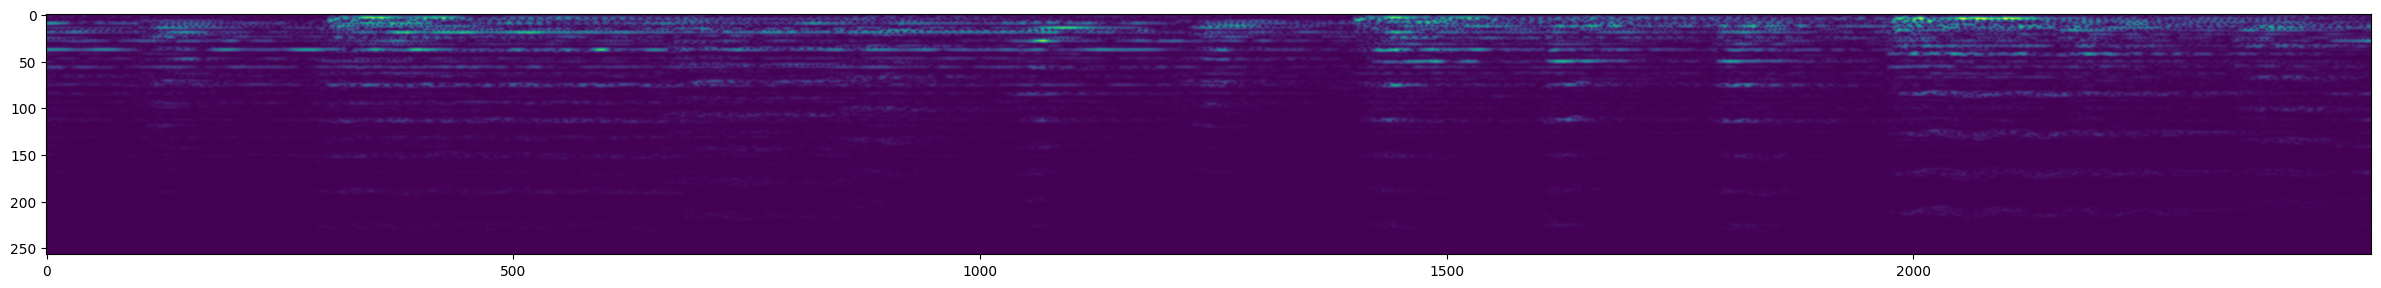

In [23]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram_classical)[0])
plt.show()

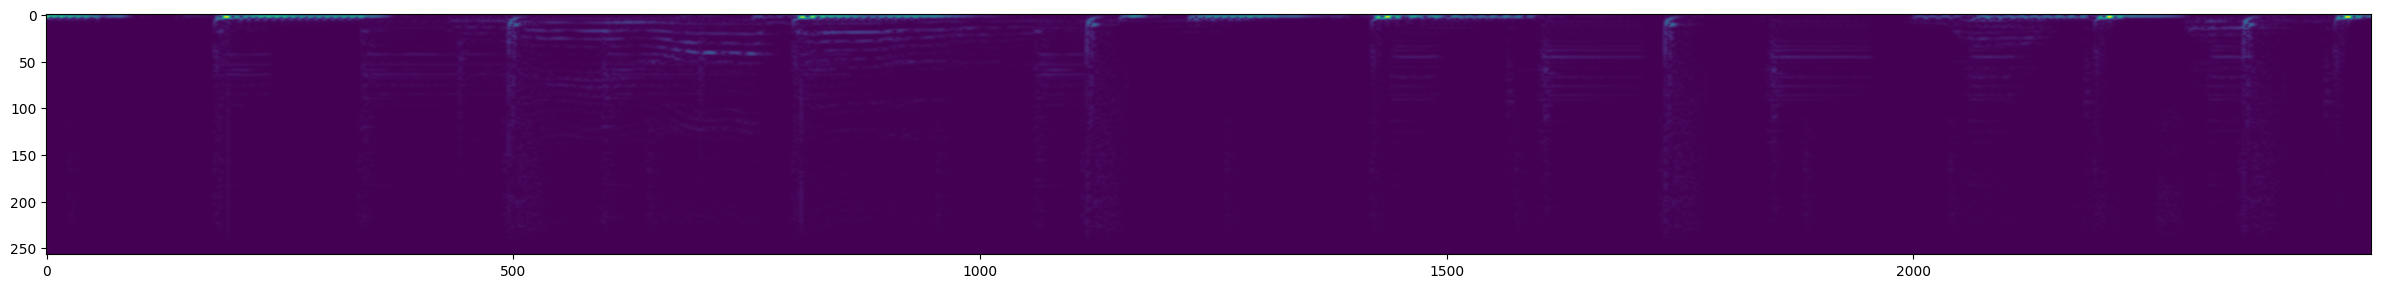

In [24]:
plt.figure(figsize=(30,20))
# plt.imshow(tf.transpose(spectrogram_classical)[0])
# plt.imshow(tf.transpose(spectrogram_country)[0])
# plt.imshow(tf.transpose(spectrogram_disco)[0])
# plt.imshow(tf.transpose(spectrogram_hiphop)[0])
# plt.imshow(tf.transpose(spectrogram_jazz)[0])
plt.imshow(tf.transpose(spectrogram_hiphop)[0])
# plt.imshow(tf.transpose(spectrogram_pop)[0])
# plt.imshow(tf.transpose(spectrogram_reggae)[0])
# plt.imshow(tf.transpose(spectrogram_rock)[0])
plt.show()

# 6. Create Training and Testing Partitions

## 6.1 Create a Tensorflow Data Pipeline

In [25]:
data.as_numpy_iterator().next()

(b'data\\genres_original\\classical\\classical.00077.wav',
 array([1., 0., 0., 0., 0.], dtype=float32))

In [26]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)
#potential for optimisation

## 6.2 Split into Training and Testing Partitions

In [28]:
len(data)*.7

22.4

In [29]:
train = data.take(22)
test = data.skip(22).take(10)

In [30]:
print(test)

<TakeDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>


## 6.3 Test One Batch

In [31]:
samples, labels = train.as_numpy_iterator().next()

In [32]:
samples.shape

(16, 2491, 257, 1)

# 7. Build Deep Learning Model

## 7.1 Load Tensorflow Dependencies

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

## 7.2 Build Sequential Model, Compile and View Summary

In [34]:
num_class = 5

model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(2491, 257, 1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_class, activation='softmax'))

In [35]:
# model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 2489, 255, 16)     160       
                                                                 
 conv2d_1 (Conv2D)           (None, 2487, 253, 16)     2320      
                                                                 
 flatten (Flatten)           (None, 10067376)          0         
                                                                 
 dense (Dense)               (None, 128)               1288624256
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 1,288,627,381
Trainable params: 1,288,627,381
Non-trainable params: 0
_________________________________________________________________


## 7.3 Fit Model, View Loss and KPI Plots

In [37]:
hist = model.fit(train, epochs=5, validation_data=test)

Epoch 1/5
22/22 [==============================] - 313s 14s/step - loss: 112.4764 - accuracy: 0.2812 - recall: 0.2670 - precision: 0.2831 - val_loss: 3.2776 - val_accuracy: 0.4527 - val_recall: 0.4189 - val_precision: 0.4627
Epoch 2/5
22/22 [==============================] - 276s 12s/step - loss: 1.3537 - accuracy: 0.5909 - recall: 0.4972 - precision: 0.6629 - val_loss: 0.8425 - val_accuracy: 0.7027 - val_recall: 0.6081 - val_precision: 0.7965
Epoch 3/5
22/22 [==============================] - 362s 17s/step - loss: 0.6896 - accuracy: 0.7614 - recall: 0.6193 - precision: 0.8417 - val_loss: 0.4783 - val_accuracy: 0.8311 - val_recall: 0.7568 - val_precision: 0.9032
Epoch 4/5
22/22 [==============================] - 220s 10s/step - loss: 0.4002 - accuracy: 0.8608 - recall: 0.7841 - precision: 0.8932 - val_loss: 0.3806 - val_accuracy: 0.8716 - val_recall: 0.8176 - val_precision: 0.8897
Epoch 5/5
22/22 [==============================] - 171s 8s/step - loss: 0.2576 - accuracy: 0.9347 - recall

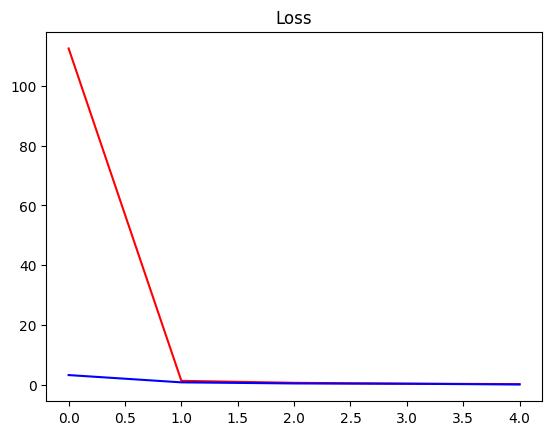

In [38]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

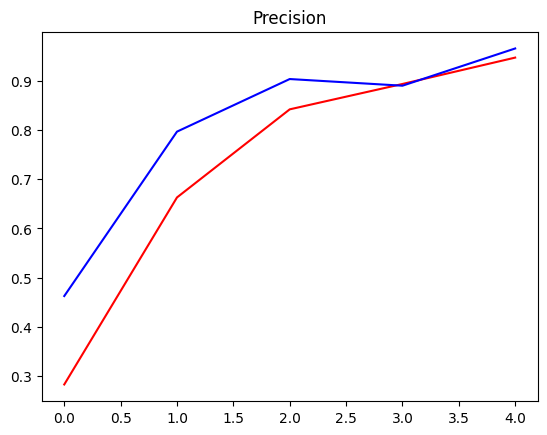

In [39]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

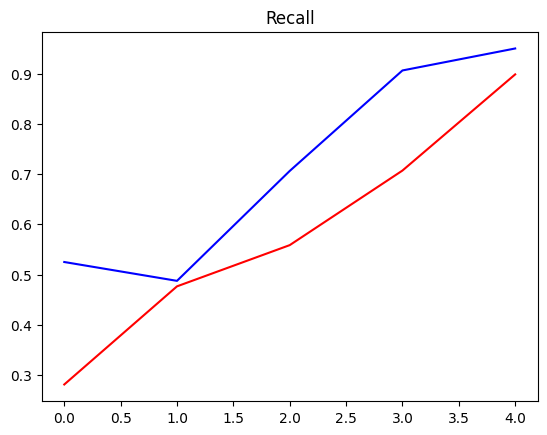

In [37]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

# 8. Make a Prediction on a Single Clip

## 8.1 Get One Batch and Make a Prediction

In [40]:
X_test, y_test = test.as_numpy_iterator().next()

In [41]:
yhat = model.predict(X_test)

In [42]:
print(yhat)

[[9.99863267e-01 5.88771002e-07 1.06333217e-04 3.25877113e-06
  2.65390790e-05]
 [4.29520325e-04 2.15055700e-03 9.94612932e-01 2.29787524e-03
  5.09134901e-04]
 [6.81814299e-06 2.73908209e-02 4.34491485e-05 9.72535193e-01
  2.37028908e-05]
 [1.71804288e-07 2.75479741e-02 7.91693106e-04 9.71660018e-01
  2.41025049e-07]
 [7.25691393e-07 9.16737437e-01 8.03401023e-02 2.92167813e-03
  7.21803728e-10]
 [8.69340152e-02 2.24486389e-03 1.12433941e-03 3.64024448e-03
  9.06056464e-01]
 [3.16334307e-01 1.09562315e-02 2.21614391e-02 4.07478493e-03
  6.46473229e-01]
 [1.68019255e-06 2.28241459e-03 9.97667313e-01 4.82321193e-05
  3.41989534e-07]
 [9.40452144e-02 3.00526507e-02 8.57526243e-01 9.78558231e-03
  8.59023258e-03]
 [7.72070289e-01 9.87131801e-03 2.60178596e-02 2.31391343e-04
  1.91809133e-01]
 [2.51242222e-04 6.00095773e-05 9.99235392e-01 4.13424481e-04
  3.99759119e-05]
 [1.18107419e-05 8.02918315e-01 3.39652747e-02 1.63104251e-01
  2.84074645e-07]
 [0.00000000e+00 0.00000000e+00 1.000000

## 8.2 Convert Logits to Classes 

In [43]:
# yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]
predicted_classes = np.argmax(yhat, axis=1) # having the list of genres which were predicted by the model for each song
#0 is for classical
#1 is for hiphop
#2 is for jazz
#3 is for pop
#4 is for rock

In [44]:
list(predicted_classes) 

[0, 2, 3, 3, 1, 4, 4, 2, 2, 0, 2, 1, 2, 1, 4, 2]

# X.X Saving the model

In [ ]:
from tensorflow.keras.models import load_model

model.save('model.h5')

# 9. Build Forest Parsing Functions

## 9.1 Load up MP3s

In [45]:
def load_mp3_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels 
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2 
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [97]:
# mp3 = os.path.join('data', 'Forest Recordings', 'recording_00.mp3')
# mp3 = 'C:\\Users\\S Karun Vikhash\\Downloads\\ADS\\OOAD\\SHAPE OF YOU 1.mp3'
mp3 = 'C:\\Users\\S Karun Vikhash\\Downloads\\ADS\\OOAD\\HIPHOP.wav'
# mp3 = 'C:\\Users\\S Karun Vikhash\\Downloads\\ADS\\OOAD\\M83 - Midnight City (Instrumental).mp3'

In [98]:
wav = load_mp3_16k_mono(mp3)

In [99]:
# audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=80000, sequence_stride=40000, batch_size=1)

In [100]:
samples, index = audio_slices.as_numpy_iterator().next()

## 9.2 Build Function to Convert Clips into Windowed Spectrograms

In [101]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([80000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

## 9.3 Convert Longer Clips into Windows and Make Predictions

In [102]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=80000, sequence_stride=40000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [103]:
yhat = model.predict(audio_slices)
print(yhat)
print(len(yhat))
# yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]
predicted_classes = np.argmax(yhat, axis=1)
print(list(predicted_classes) )

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0.

In [104]:
from collections import Counter
predicted_list = list(predicted_classes)
# Count the occurrences of each element
element_counts = Counter(predicted_list)

# Sort the elements based on frequency (descending order)
sorted_elements = sorted(element_counts.items(), key=lambda x: x[1], reverse=True)

# Display the sorted elements
for element, count in sorted_elements:
    print(f"Element: {element}, Frequency: {count}")

#0 is for classical
#1 is for hiphop
#2 is for jazz
#3 is for pop
#4 is for rock

Element: 3, Frequency: 86
Element: 1, Frequency: 36
Element: 4, Frequency: 18
Element: 0, Frequency: 4


## 9.4 Group Consecutive Detections

In [67]:
from itertools import groupby

In [68]:
yhat = [key for key, group in groupby(yhat)]
calls = tf.math.reduce_sum(yhat).numpy()

In [69]:
calls

1.0

# 10. Make Predictions

## 10.1 Loop over all recordings and make predictions

In [ ]:
results = {}
for file in os.listdir(os.path.join('data', 'Forest Recordings')):
    FILEPATH = os.path.join('data','Forest Recordings', file)
    
    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)
    
    yhat = model.predict(audio_slices)
    
    results[file] = yhat

In [ ]:
results

## 10.2 Convert Predictions into Classes

In [ ]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
class_preds

## 10.3 Group Consecutive Detections

In [ ]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

# 11. Export Results

In [ ]:
import csv

In [ ]:
with open('results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])